In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv('dataset/test.csv')
train = pd.read_csv('dataset/train.csv')


In [93]:
train.head()

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligram

In [6]:
for i in range(100):
    print(train.iloc[i,:]['image_link'])


https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg
https://m.media-amazon.com/images/I/71gSRbyXmoL.jpg
https://m.media-amazon.com/images/I/61BZ4zrjZXL.jpg
https://m.media-amazon.com/images/I/612mrlqiI4L.jpg
https://m.media-amazon.com/images/I/617Tl40LOXL.jpg
https://m.media-amazon.com/images/I/61QsBSE7jgL.jpg
https://m.media-amazon.com/images/I/81xsq6vf2qL.jpg
https://m.media-amazon.com/images/I/71DiLRHeZdL.jpg
https://m.media-amazon.com/images/I/91Cma3RzseL.jpg
https://m.media-amazon.com/images/I/71jBLhmTNlL.jpg
https://m.media-amazon.com/images/I/81N73b5khVL.jpg
https://m.media-amazon.com/images/I/61oMj2iXOuL.jpg
https://m.media-amazon.com/images/I/91LPf6OjV9L.jpg
https://m.media-amazon.com/images/I/81fOxWWWKYL.jpg
https://m.media-amazon.com/images/I/81dzao1Ob4L.jpg
https://m.media-amazon.com/images/I/91-iahVGEDL.jpg
https://m.media-amazon.com/images/I/81S2+GnYpTL.jpg
https://m.media-amazon.com/images/I/81e2YtCOKvL.jpg
https://m.media-amazon.com/images/I/81RNsNEM1EL.jpg
https://m.me

In [5]:
train.shape

(263859, 4)

In [7]:
for col in train.columns:
    print(f"{col} has {len(train[col].unique())} unique values")

image_link has 255906 unique values
group_id has 750 unique values
entity_name has 8 unique values
entity_value has 16405 unique values


In [9]:
train['entity_name'].unique()

array(['item_weight', 'item_volume', 'voltage', 'wattage',
       'maximum_weight_recommendation', 'height', 'depth', 'width'],
      dtype=object)

In [8]:
imgs_per_id = pd.pivot_table(train, values = 'image_link',index = 'group_id', aggfunc=pd.Series.nunique)
imgs_per_id.head()

image_link
group_id            
101697            53
104874           132
106003           177
107694          1163
107915            25

In [14]:
entities_per_id = pd.pivot_table(train, values = 'entity_name',index = 'group_id', aggfunc=pd.Series.nunique)
entities_per_id.head()

entity_name
group_id             
101697              2
104874              2
106003              2
107694              3
107915              4

In [13]:
train.isnull().sum()

image_link      0
group_id        0
entity_name     0
entity_value    0
dtype: int64

In [33]:
l = train['entity_value']
for item in l:
    print(f"{item} , {len(item.split(' '))}")


500.0 gram , 2
1.0 cup , 2
0.709 gram , 2
0.709 gram , 2
1400 milligram , 2
1400 milligram , 2
1400 milligram , 2
1400 milligram , 2
1400 milligram , 2
1400 milligram , 2
30.0 kilogram , 2
10 kilogram to 15 kilogram , 5
3.53 ounce , 2
3.53 ounce , 2
53 ounce , 2
100 gram , 2
200 gram , 2
1 kilogram , 2
200 gram , 2
200 gram , 2
200 gram , 2
4.0 gallon , 2
2.7 gram , 2
112 gram , 2
4.1 kilogram , 2
48.0 volt , 2
158.0 gram , 2
158.0 gram , 2
5000 milligram , 2
18.55 gram , 2
18.55 gram , 2
18.55 gram , 2
18.55 gram , 2
18.55 gram , 2
50.0 gram , 2
26.0 gram , 2
800.0 watt , 2
36.0 volt , 2
330.0 pound , 2
31.0 ounce , 2
0.35 ounce , 2
35.0 gram , 2
150.0 watt , 2
150.0 watt , 2
30.0 watt , 2
30.0 watt , 2
15.5 gram , 2
200.0 gram , 2
250.0 watt , 2
10.0 ounce , 2
0.8 kilogram , 2
169.0 gram , 2
10.0 gram , 2
7.0 gram , 2
750.0 gram , 2
160.0 gram , 2
270.0 gram , 2
500 gram , 2
1 kilogram , 2
10 kilogram , 2
1 kilogram , 2
2.2 pound , 2
60.0 watt , 2
30.0 millilitre , 2
30.0 millilitre 

In [34]:
big_values = [item for item in l if len(item.split(' '))>2]
big_values

['10 kilogram to 15 kilogram',
 '3.0 cubic foot',
 '[100.0, 240.0] volt',
 '[8.0, 12.0] fluid ounce',
 '16.0 fluid ounce',
 '[85.0, 265.0] volt',
 '4.0 fluid ounce',
 '4.0 fluid ounce',
 '4.0 fluid ounce',
 '4.0 fluid ounce',
 '[25.0, 30.0] pound',
 '2.55 cubic inch',
 '[175.0, 265.0] volt',
 '1.69 fluid ounce',
 '64.0 fluid ounce',
 '8.0 fluid ounce',
 '8.0 fluid ounce',
 '[220.0, 240.0] volt',
 '8.0 fluid ounce',
 '[11.0, 12.0] ounce',
 '[70.0, 100.0] millilitre',
 '128.0 fluid ounce',
 '128.0 fluid ounce',
 '[17.0, 21.0] kilogram',
 '[13.0, 16.0] kilogram',
 '[13.0, 16.0] kilogram',
 '[11.0, 17.0] volt',
 '[220.0, 250.0] volt',
 '[1.0, 2.0] gram',
 '[7.0, 25.0] kilogram',
 '1.76 fluid ounce',
 '1.76 fluid ounce',
 '1.76 fluid ounce',
 '50.0 fluid ounce',
 '1.76 fluid ounce',
 '1.69 fluid ounce',
 '1.69 fluid ounce',
 '1.69 fluid ounce',
 '1.69 fluid ounce',
 '8.0 fluid ounce',
 '[135.0, 150.0] kilogram',
 '[5.0, 11.0] kilogram',
 '[5.0, 11.0] kilogram',
 '10 kilogram to 25 kilogram'

In [9]:
import re
count = 0
values = []
units = []
for value in train['entity_value']:
   
    val = 0
    unit = ''
    # print(f"{count} - {value}")
    if ' to ' in value:
        # print(value)
        numbers = re.findall(r'\d+\.?\d*', value)
        words = re.findall(r'[a-zA-Z]+', value)
      
        # print(f"{numbers}, {words} ")
        if(words[0] != words[2]): count+=1

        val =(float(numbers[0]) + float(numbers[1])) / 2
        # print(val)
        unit = words[0]
        # print(f"{val}, {unit}")

        pass
    
    elif '[' in value and ']' in value:
        # print(value)
        numbers = re.findall(r'\d+\.?\d*', value)
        words = re.findall(r'[a-zA-Z]+', value)
        # print(f"{numbers}, {words} ")
        val =(float(numbers[0]) + float(numbers[1])) / 2
        if(len(words) > 1):
          unit += words[0]
          for i in range(1,len(words)):
              unit += ' '
              unit += words[i]
        else:
            unit = words[0]
        pass

    else:
        # print(value)
        p = value.split(' ',1)
        val  =p[0]
        unit = p[1]
        pass
    
    # print(f" transformed = {val}, {unit}")
    values.append(val)
    units.append(unit) 
    count += 1    

train['entity_value_nos'] = values
train['entity_value_units'] = units      
     

In [10]:
train.head()

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value entity_value_nos entity_value_units  
0      500.0 gram            500.0               gram  
1         1.0 cup              1.0                cup  
2      0.709 gram            0.709               gram  
3      0.709 gram            0.709               gram  
4  1400 milligram             1400          milligram

In [ ]:
train[train['entity_value_nos'] ]

In [67]:
len(train['entity_value_units'].unique())

35

In [97]:
train['entity_value_units'].unique()

array(['gram', 'cup', 'milligram', 'kilogram', 'ounce', 'gallon', 'volt',
       'watt', 'pound', 'millilitre', 'cubic foot', 'fluid ounce', 'ton',
       'decilitre', 'cubic inch', 'litre', 'microgram', 'centimetre',
       'quart', 'horsepower', 'kilowatt', 'kilowatt hour', 'gigabyte',
       'millimetre', 'pint', 'centilitre', 'candela', 'inch', 'person',
       'metre', 'foot', 'carat', 'e+17 pound', 'milliampere hour', 'nits'],
      dtype=object)

In [11]:
train['entity_value_nos'].dtype
train['entity_value_nos'] = pd.to_numeric(train['entity_value_nos'],errors='coerce')

In [101]:
train['entity_value_nos'].dtype

dtype('float64')

In [24]:
train = (train[train['entity_value_nos'] <= 10**5])
train = (train[train['entity_value_nos'] >= 10**(-2)])

In [27]:
train.loc[train['entity_value_units'] == 'horsepower','entity_value_nos'] *= 0.7457
train.loc[train['entity_value_units'] == 'horsepower','entity_value_units'] = 'kilowatt'
train.loc[train['entity_value_units'] == 'kilowatt']



image_link  group_id  \
798     https://m.media-amazon.com/images/I/615svlFid7...    412008   
852     https://m.media-amazon.com/images/I/71CteQL4iV...    318770   
900     https://m.media-amazon.com/images/I/71CE2IDHBh...    892291   
980     https://m.media-amazon.com/images/I/512o5+oehq...    955292   
1668    https://m.media-amazon.com/images/I/81+tdG6q26...    892291   
...                                                   ...       ...   
128714  https://m.media-amazon.com/images/I/71GtHeMkQz...    955292   
129747  https://m.media-amazon.com/images/I/71TvxfD80n...    318770   
130587  https://m.media-amazon.com/images/I/71gXbm2NZ-...    955292   
130952  https://m.media-amazon.com/images/I/41rdZWsHsU...    955292   
131136  https://m.media-amazon.com/images/I/71DrglS1Bw...    955292   

       entity_name       entity_value  entity_value_nos entity_value_units  
798        wattage     3.0 horsepower            2.2371           kilowatt  
852        wattage  1080.0 horsepower          805.3560           kilowatt  
900        wattage      22.0 kilowatt           22.0000           kilowatt  
980        wattage  1080.0 horsepower          805.3560           kilowatt  
1668       wattage       7.4 kilowatt            7.4000           kilowatt  
...            ...                ...               ...                ...  
128714     wattage  1080.0 horsepower          805.3560           kilowatt  
129747     wattage  1080.0 horsepower          805.3560           kilowatt  
130587     wattage  1080.0 horsepower          805.3560           kilowatt  
130952     wattage  1080.0 horsepower          805.3560           kilowatt  
131136     wattage  1080.0 horsepower          805.3560           kilowatt  

[324 rows x 6 columns]

In [28]:
train[train['entity_value_units'] == 'carat'].head()

image_link  group_id  \
27484  https://m.media-amazon.com/images/I/810JnkrxfE...    299791   
45400  https://m.media-amazon.com/images/I/71qO6uqDSG...    524635   
51810  https://m.media-amazon.com/images/I/81UAxTTx-l...    299791   

       entity_name entity_value  entity_value_nos entity_value_units  
27484  item_weight  11.15 carat             11.15              carat  
45400  item_weight      3 carat              3.00              carat  
51810  item_weight  14.81 carat             14.81              carat

In [29]:
train.loc[train['entity_value_units'] == 'carat','entity_value_nos'] *= 200
train.loc[train['entity_value_units'] == 'carat','entity_value_units'] = 'milligram'
train.loc[train['entity_value_units'] == 'carat']

Empty DataFrame
Columns: [image_link, group_id, entity_name, entity_value, entity_value_nos, entity_value_units]
Index: []

In [30]:
train[train['entity_value_units'] == 'e+17 pound'].head()

image_link  group_id  \
36560  https://m.media-amazon.com/images/I/41hyJhcdjS...    709627   

       entity_name                  entity_value  entity_value_nos  \
36560  item_weight  5.016481104150004 e+17 pound          5.016481   

      entity_value_units  
36560         e+17 pound

In [32]:
train.loc[train['entity_value_units'] == 'e+17 pound','entity_value_nos'] *= 10**17 
train.loc[train['entity_value_units'] == 'e+17 pound','entity_value_units'] = 'pound'
train.loc[train['entity_value_units'] == 'e+17 pound']

Empty DataFrame
Columns: [image_link, group_id, entity_name, entity_value, entity_value_nos, entity_value_units]
Index: []

In [33]:
from src.constants import allowed_units

train['entity_value_units'].unique()

array(['gram', 'cup', 'milligram', 'kilogram', 'ounce', 'gallon', 'volt',
       'watt', 'pound', 'millilitre', 'cubic foot', 'fluid ounce', 'ton',
       'decilitre', 'cubic inch', 'litre', 'microgram', 'centimetre',
       'quart', 'kilowatt', 'kilowatt hour', 'gigabyte', 'millimetre',
       'pint', 'centilitre', 'candela', 'inch', 'person', 'metre', 'foot',
       'nits'], dtype=object)

In [34]:
train[train['entity_value_units'] == 'nits'].count()

image_link            1
group_id              1
entity_name           1
entity_value          1
entity_value_nos      1
entity_value_units    1
dtype: int64

In [35]:
dropped_units =['candela','nits','person','milliampere hour','kilowatt hour']

train = train.loc[~train['entity_value_units'].isin(dropped_units)]

In [36]:
train.head()

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  entity_value_nos entity_value_units  
0      500.0 gram           500.000               gram  
1         1.0 cup             1.000                cup  
2      0.709 gram             0.709               gram  
3      0.709 gram             0.709               gram  
4  1400 milligram          1400.000          milligram

In [37]:
train.shape

(262837, 6)

In [40]:
train.groupby(by='entity_name').count()

image_link  group_id  entity_value  \
entity_name                                                         
depth                               45127     45127         45127   
height                              43596     43596         43596   
item_volume                          7583      7583          7583   
item_weight                        101992    101992        101992   
maximum_weight_recommendation        3234      3234          3234   
voltage                              9445      9445          9445   
wattage                              7676      7676          7676   
width                               44183     44183         44183   

                               entity_value_nos  entity_value_units  
entity_name                                                          
depth                                     45127               45127  
height                                    43596               43596  
item_volume                                7583                7583  
item_weight                              101992              101992  
maximum_weight_recommendation              3234                3234  
voltage                                    9445                9445  
wattage                                    7676                7676  
width                                     44183               44183

In [39]:
train = (train[train['entity_value_nos'] <= 10**5])
train = (train[train['entity_value_nos'] >= 10**(-2)])

In [41]:
train.drop(columns='entity_value',inplace=True)
train.head()

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

   entity_value_nos entity_value_units  
0           500.000               gram  
1             1.000                cup  
2             0.709               gram  
3             0.709               gram  
4          1400.000          milligram

In [42]:
train.to_csv('processed_train.csv',index=False)

In [116]:
train.head()

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  entity_value_nos entity_value_units  
0      500.0 gram           500.000               gram  
1         1.0 cup             1.000                cup  
2      0.709 gram             0.709               gram  
3      0.709 gram             0.709               gram  
4  1400 milligram          1400.000          milligram

In [19]:
len(train['unit'].unique())

610

In [118]:
train['entity_value_units'].unique()

array(['gram', 'cup', 'milligram', 'kilogram', 'ounce', 'gallon', 'volt',
       'watt', 'pound', 'millilitre', 'cubic foot', 'fluid ounce', 'ton',
       'decilitre', 'cubic inch', 'litre', 'microgram', 'centimetre',
       'quart', 'kilowatt', 'kilowatt hour', 'gigabyte', 'millimetre',
       'pint', 'centilitre', 'candela', 'inch', 'person', 'metre', 'foot',
       'milliampere hour', 'nits'], dtype=object)

In [141]:
import requests
from multiprocessing import Pool
import pandas as pd

def check_url(url):
    try:
        response = requests.head(url, timeout=5)  # Use HEAD to just check the headers, faster than GET
        if response.status_code == 200:
            return True
        else:
            return False
    except requests.RequestException:  # Catch any request-related error
        return False
    
def filter_bad_urls(df, url_column):
    urls = df[url_column].tolist()  # Extract the URLs from the DataFrame

    with Pool(processes=4) as pool:  # Adjust number of processes based on your CPU
        valid_urls = pool.map(check_url, urls)  # Check each URL in parallel

    return df[valid_urls]  # Return rows where the URLs are vali

In [139]:
train_vol = train.loc[train['entity_name'] == 'item_volume']
train_vol.shape

(7682, 5)

In [142]:
filtered_train_vol = filter_bad_urls(train_vol, 'image_link')

# Dump

In [ ]:
! pip install constants

In [ ]:
# import requests
# from tqdm import tqdm  # Progress bar for downloading
# from src.utils import *
# import constants

# base_dir = 'images'
# if not os.path.exists(base_dir):
#     os.makedirs(base_dir)

# not_down = []


# for index, row in tqdm(train.iterrows(), total=train.shape[0]):
#     entity_name = row['entity_name']
#     image_link = row['image_link']
#     group_id = row['group_id']

    
#     entity_dir = os.path.join(base_dir, entity_name)
#     if not os.path.exists(entity_dir):
#         os.makedirs(entity_dir)
    
#     # filename = f"{group_id}.jpg"
#     # image_path = os.path.join(entity_dir, filename)

#     try:
#         # response = requests.get(image_link, stream=True)
#         # if response.status_code == 200:
#         #     with open(image_path, 'wb') as out_file:
#         #         out_file.write(response.content)
#         # else:
#         #     print(f"Failed to download {image_link}")
#         download_image(image_links=image_link,download_folder=entity_dir,allow_multiprocessing=True)
#     except Exception as e:
#         print(f"Error downloading {image_link}: {e}")
    
# print("Download complete!")

In [ ]:
for entity in train['entity_name'].unique():
    df = train[train['entity_name'] == entity]
    print(df)
    break

In [ ]:
# from src.utils import *
# import os

# base_dir = 'images'
# if not os.path.exists(base_dir):
#     os.makedirs(base_dir)

# for entity in train['entity_name'].unique():
#     entity_dir = os.path.join(base_dir, entity)
#     if not os.path.exists(entity_dir):
#         os.makedirs(entity_dir)
    
#     entity_df = train[train['entity_name'] == entity]

#     image_links = entity_df['image_link']
#     download_images(
#    image_links=image_links, download_folder=entity_dir
#     )
    
    
    


## Final Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('process_train_final.csv')
df.head()

Unnamed: 0                                         image_link  group_id  \
0           1  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516   
1           2  https://m.media-amazon.com/images/I/612mrlqiI4...    459516   
2           9  https://m.media-amazon.com/images/I/81N73b5khV...    149159   
3          10  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856   
4          11  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678   

   entity_name  entity_value_nos entity_value_units  
0  item_weight             0.709               gram  
1  item_weight             0.709               gram  
2  item_weight            30.000           kilogram  
3  item_weight            12.500           kilogram  
4  item_weight             3.530              ounce

In [53]:
# Define the conversion factor dictionary (as shown above)
conversion_factors = {
    'gram': 1, 'kilogram': 1000, 'milligram': 0.001, 'microgram': 1e-6, 'ton': 1e6, 'ounce': 28.3495, 'pound': 453.592,
    'millilitre': 1, 'litre': 1000, 'cup': 240, 'fluid ounce': 29.5735, 'quart': 946.353, 'gallon': 3785.41, 
    'cubic foot': 28316.8, 'cubic inch': 16.3871, 'decilitre': 100, 'centilitre': 10, 'pint': 473.176,
    'centimetre': 1, 'metre': 100, 'millimetre': 0.1, 'inch': 2.54, 'foot': 30.48,
    'volt': 1, 'watt': 1, 'kilowatt': 1000
}

# These are the max occurring units for each entity_name
standard_units = {
    'depth': 'centimetre',
    'height': 'centimetre',
    'item_volume': 'millilitre',
    'item_weight': 'gram',
    'maximum_weight_recommendation': 'kilogram',
    'voltage': 'volt',
    'wattage': 'watt',
    'width': 'centimetre'
}

# Function to apply the conversion
def convert_to_standard_unit(row):
    entity_name = row['entity_name']
    unit = row['entity_value_units']
    value = row['entity_value_nos']
    
    # Get the standard unit for this entity_name
    standard_unit = standard_units[entity_name]
    
    # Get the conversion factor for the current unit
    if unit in conversion_factors and standard_unit in conversion_factors:
        conversion_factor = conversion_factors[unit] / conversion_factors[standard_unit]
        return value * conversion_factor
    else:
        return value  # If unit is not in the conversion_factors, return value as is

# Apply the conversion function to the dataframe
df['entity_value_nos'] = df.apply(convert_to_standard_unit, axis=1)



In [ ]:
# Define the conversion factor dictionary (as shown above)
conversion_factors = {
    'gram': 1, 'kilogram': 1000, 'milligram': 0.001, 'microgram': 1e-6, 'ton': 1e6, 'ounce': 28.3495, 'pound': 453.592,
    'millilitre': 1, 'litre': 1000, 'cup': 240, 'fluid ounce': 29.5735, 'quart': 946.353, 'gallon': 3785.41, 
    'cubic foot': 28316.8, 'cubic inch': 16.3871, 'decilitre': 100, 'centilitre': 10, 'pint': 473.176,
    'centimetre': 1, 'metre': 100, 'millimetre': 0.1, 'inch': 2.54, 'foot': 30.48,
    'volt': 1, 'watt': 1, 'kilowatt': 1000
}

# These are the max occurring units for each entity_name
standard_units = {
    'depth': 'centimetre',
    'height': 'centimetre',
    'item_volume': 'millilitre',
    'item_weight': 'gram',
    'maximum_weight_recommendation': 'kilogram',
    'voltage': 'volt',
    'wattage': 'watt',
    'width': 'centimetre'
}

def inverse_transform(predicted_value, predicted_unit, entity_name):
    """
    Convert the standardized predicted_value back to the predicted_unit.

    predicted_value: The value predicted by the regression head in the standard unit.
    predicted_unit: The unit predicted by the classification head.
    entity_name: The type of entity (e.g., 'item_weight', 'height', etc.).
    """
    standard_unit = standard_units[entity_name]  # Lookup the standard unit for the entity (e.g., 'kilogram')
    
    if predicted_unit in conversion_factors and standard_unit in conversion_factors:
        # Calculate the inverse conversion factor
        inverse_conversion_factor = conversion_factors[standard_unit] / conversion_factors[predicted_unit]
        # Apply inverse transformation to convert from standard unit to predicted unit
        return predicted_value * inverse_conversion_factor
    else:
        return predicted_value  # If no valid conversion, return the original value

# Assuming df now contains the 'predicted_value' (standardized) and 'predicted_unit' columns
df['final_value'] = df.apply(lambda row: inverse_transform(row['predicted_value'], 
                                                          row['predicted_unit'], 
                                                          row['entity_name']), axis=1)

In [57]:
df.head()

Unnamed: 0                                         image_link  group_id  \
0           1  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516   
1           2  https://m.media-amazon.com/images/I/612mrlqiI4...    459516   
2           9  https://m.media-amazon.com/images/I/81N73b5khV...    149159   
3          10  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856   
4          11  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678   

   entity_name  entity_value_nos entity_value_units  
0  item_weight          0.709000               gram  
1  item_weight          0.709000               gram  
2  item_weight      30000.000000           kilogram  
3  item_weight      12500.000000           kilogram  
4  item_weight        100.073735              ounce

In [48]:
p = pd.pivot_table(df,values='entity_value_nos',index='entity_value_units',columns='entity_name',aggfunc='count')

for col in p.columns:
    max_index = p[col].idxmax()  # Finds the index of the max value in the column
    print(f"Max index for {col}: {max_index}")

Max index for depth: centimetre
Max index for height: centimetre
Max index for item_volume: millilitre
Max index for item_weight: gram
Max index for maximum_weight_recommendation: kilogram
Max index for voltage: volt
Max index for wattage: watt
Max index for width: centimetre


In [15]:
df = df[df['entity_value_units'] != 'gigabyte']

In [59]:
df['entity_value_nos'] = np.log1p(df['entity_value_nos'])

In [ ]:
 ## inverse of log1p = np.expm1()

In [60]:
df.head()

Unnamed: 0                                         image_link  group_id  \
0           1  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516   
1           2  https://m.media-amazon.com/images/I/612mrlqiI4...    459516   
2           9  https://m.media-amazon.com/images/I/81N73b5khV...    149159   
3          10  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856   
4          11  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678   

   entity_name  entity_value_nos entity_value_units  
0  item_weight          0.535908               gram  
1  item_weight          0.535908               gram  
2  item_weight         10.308986           kilogram  
3  item_weight          9.433564           kilogram  
4  item_weight          4.615850              ounce

In [4]:
df[df['entity_name'] =='voltage']

Unnamed: 0                                         image_link  \
16             23  https://m.media-amazon.com/images/I/71nywfWZUw...   
26             35  https://m.media-amazon.com/images/I/61o2ntPNNg...   
98            127  https://m.media-amazon.com/images/I/71Oo4M3Apx...   
107           140  https://m.media-amazon.com/images/I/81JGAcnf39...   
113           146  https://m.media-amazon.com/images/I/81xeFGugw6...   
...           ...                                                ...   
97697      123506  https://m.media-amazon.com/images/I/81c-2rAS3Z...   
97698      123507  https://m.media-amazon.com/images/I/81hOEQzbWN...   
97699      123508  https://m.media-amazon.com/images/I/61b55FWR-C...   
97706      123517  https://m.media-amazon.com/images/I/61k27alsaI...   
97712      123526  https://m.media-amazon.com/images/I/81nIeSMWmr...   

       group_id entity_name  entity_value_nos entity_value_units  
16       179080     voltage              48.0               volt  
26       179080     voltage              36.0               volt  
98       752266     voltage             170.0               volt  
107      983323     voltage              12.0               volt  
113      271537     voltage              12.0               volt  
...         ...         ...               ...                ...  
97697    648011     voltage             120.0               volt  
97698    648011     voltage             120.0               volt  
97699    752266     voltage             220.0               volt  
97706    648011     voltage             165.0               volt  
97712    271537     voltage             120.0               volt  

[9084 rows x 6 columns]

In [61]:
df = df[['image_link','group_id','entity_name','entity_value_nos','entity_value_units']]
df.head()

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
1  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
2  https://m.media-amazon.com/images/I/81N73b5khV...    149159  item_weight   
3  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856  item_weight   
4  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678  item_weight   

   entity_value_nos entity_value_units  
0          0.535908               gram  
1          0.535908               gram  
2         10.308986           kilogram  
3          9.433564           kilogram  
4          4.615850              ounce

In [62]:
df.to_csv('processed_train_unit.csv')

unit = gram, len = 48019
unit = kilogram, len = 13289
unit = ounce, len = 8578
unit = volt, len = 9084
unit = watt, len = 6040
unit = pound, len = 8277
unit = milligram, len = 2543
unit = ton, len = 1200
unit = millilitre, len = 2391
unit = centimetre, len = 64876
unit = microgram, len = 361
unit = kilowatt, len = 119
unit = millimetre, len = 15530
unit = inch, len = 45444
unit = fluid ounce, len = 2143
unit = metre, len = 1530
unit = cup, len = 84
unit = foot, len = 1341
unit = litre, len = 849
unit = quart, len = 85
unit = gallon, len = 132
unit = cubic foot, len = 48


C:\Users\HP\AppData\Local\Temp\ipykernel_18520\2561950314.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,2, figsize =(10,5))


unit = cubic inch, len = 154
unit = decilitre, len = 24
unit = pint, len = 102
unit = centilitre, len = 32


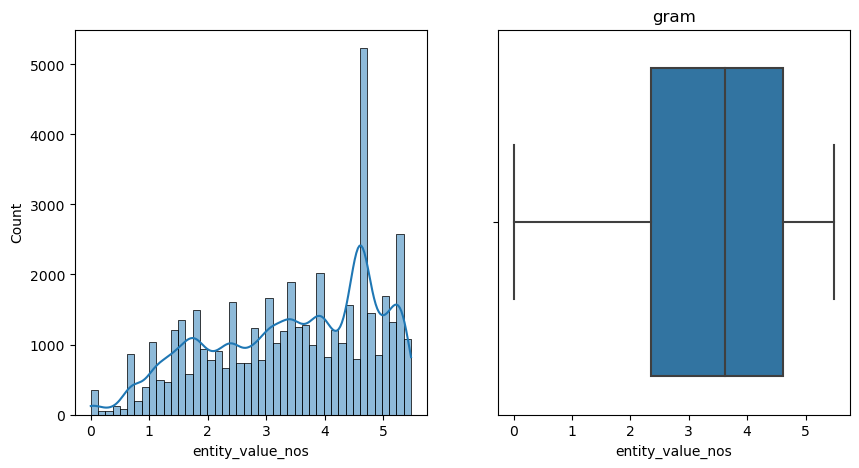

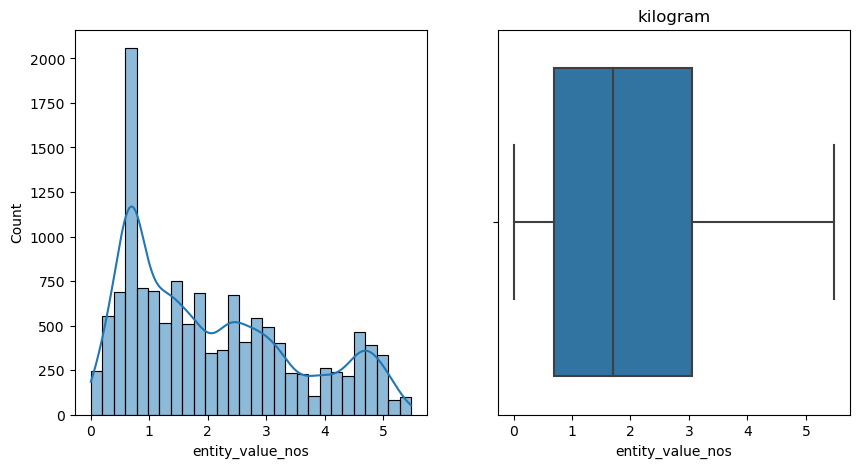

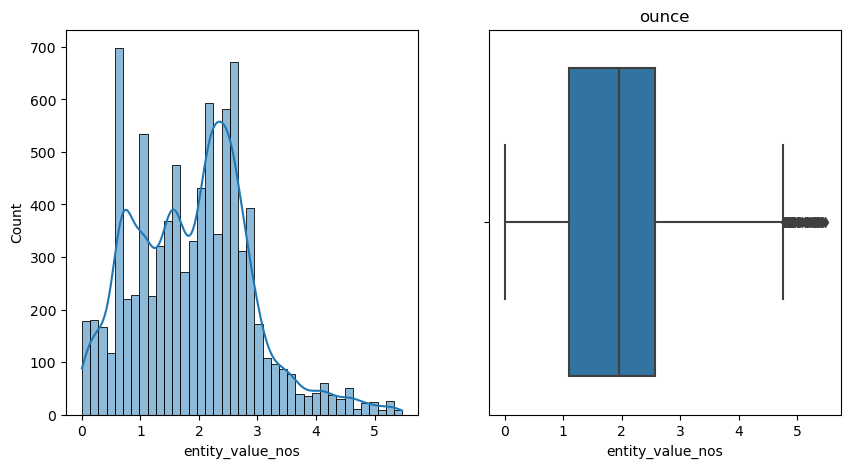

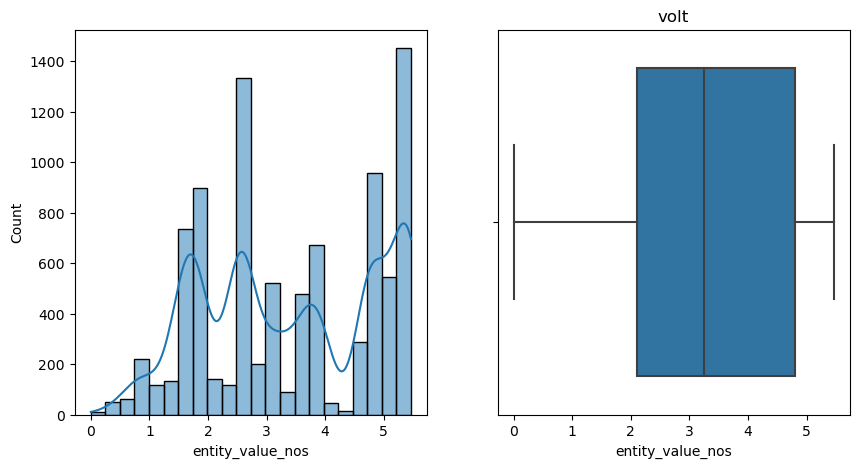

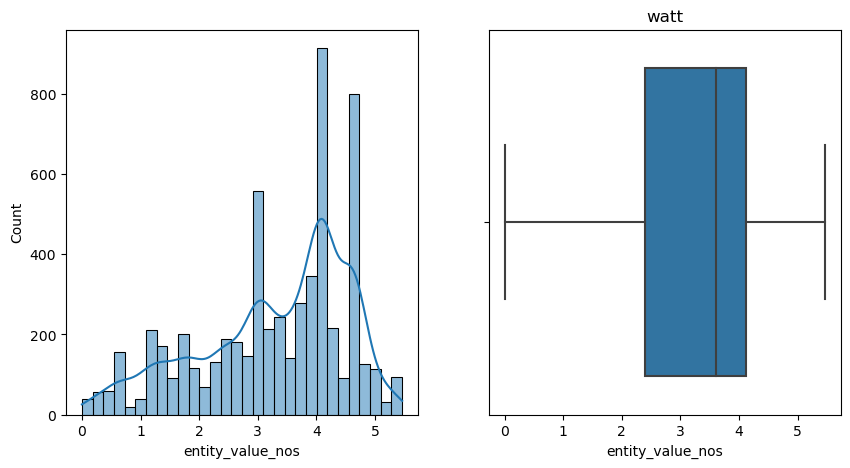

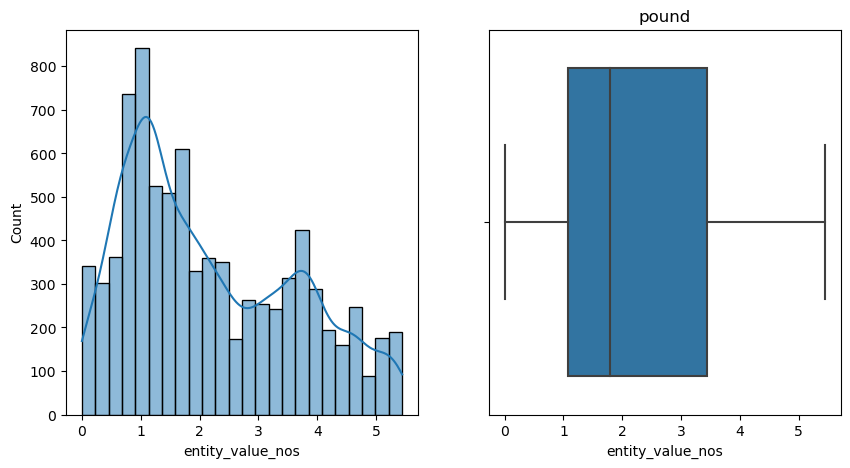

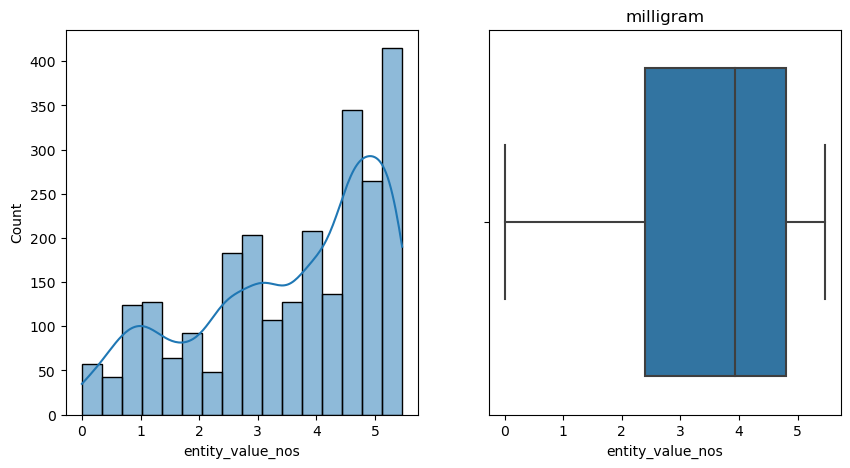

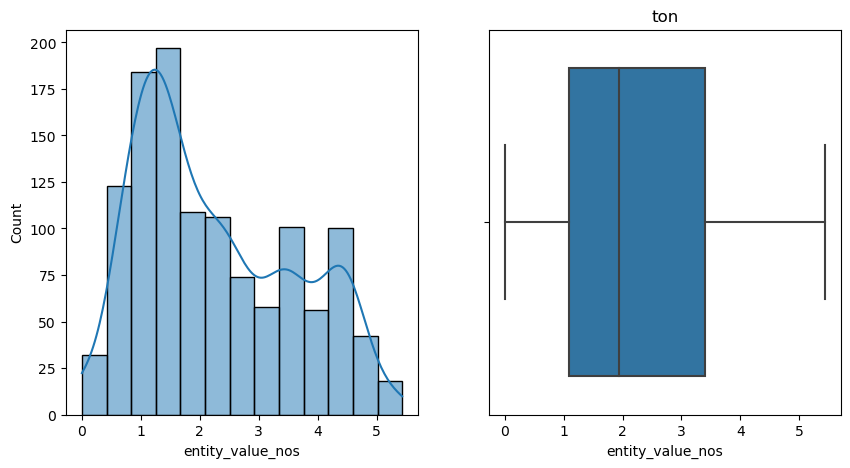

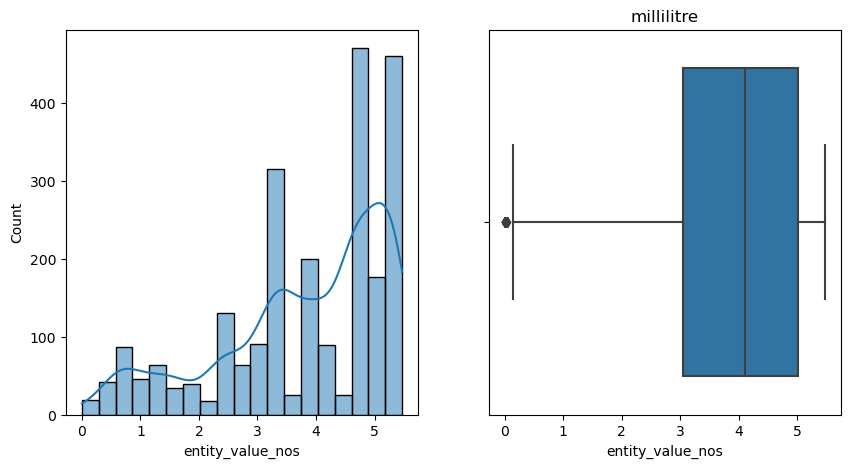

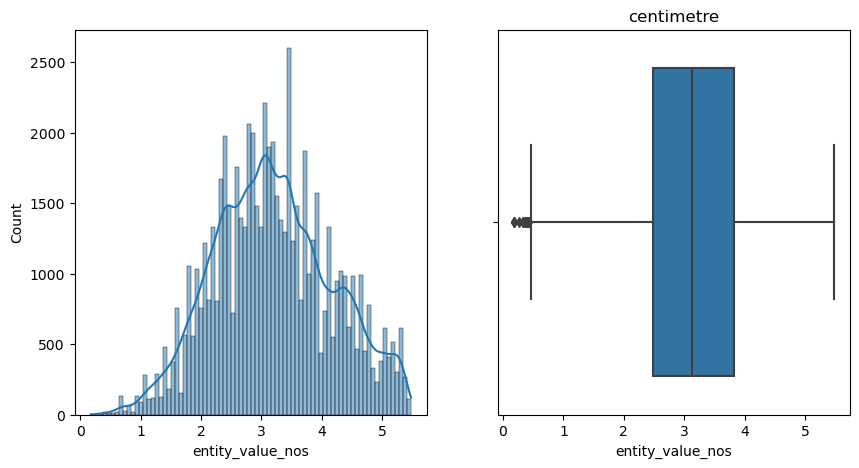

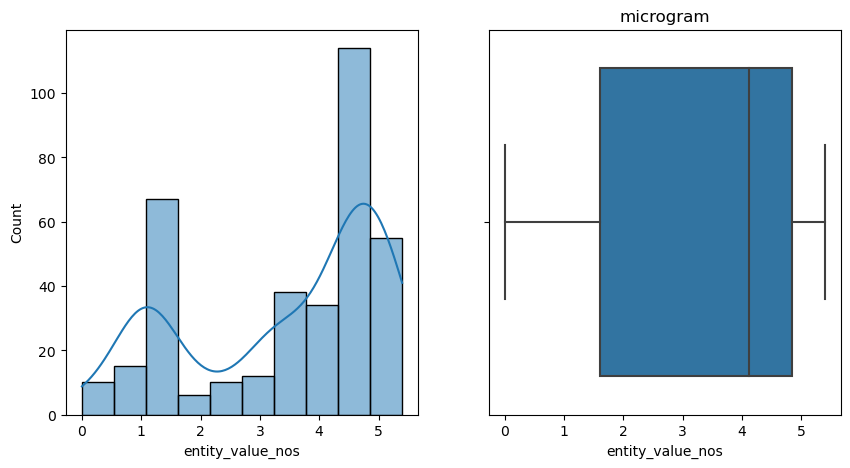

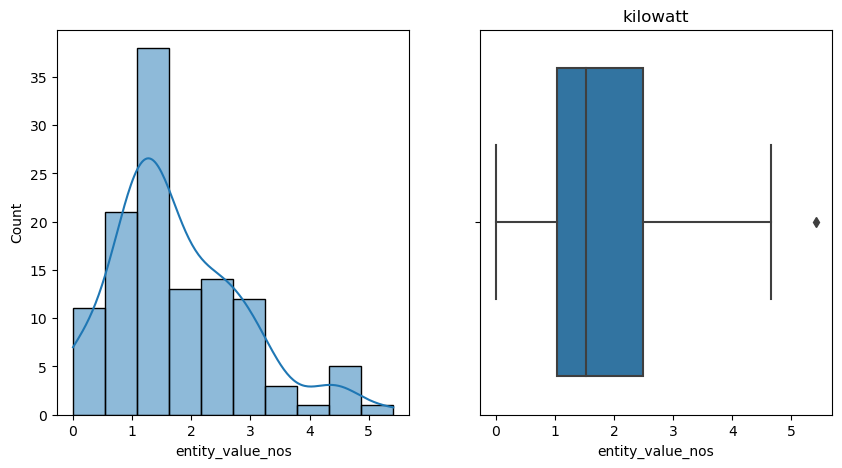

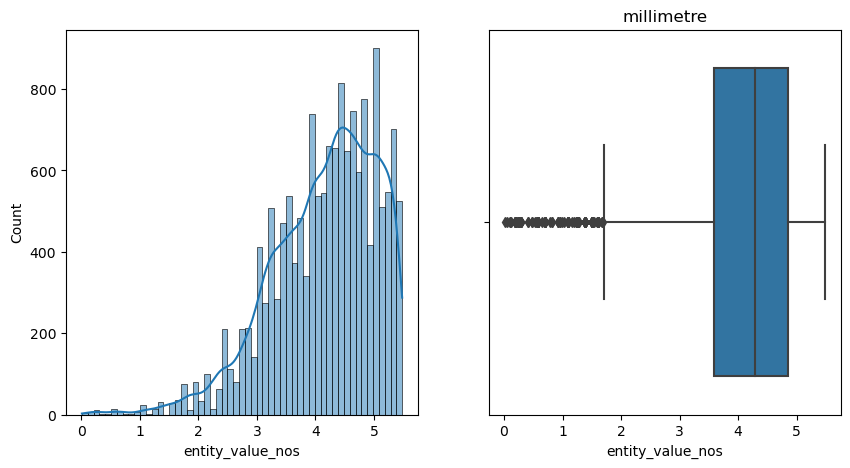

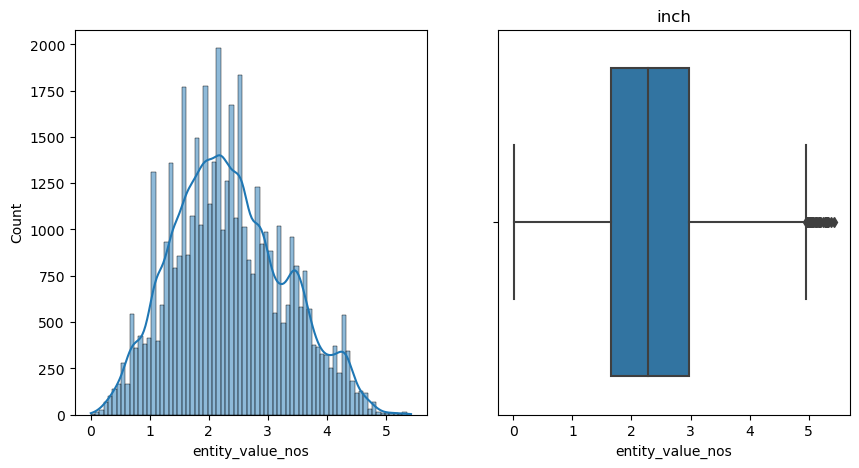

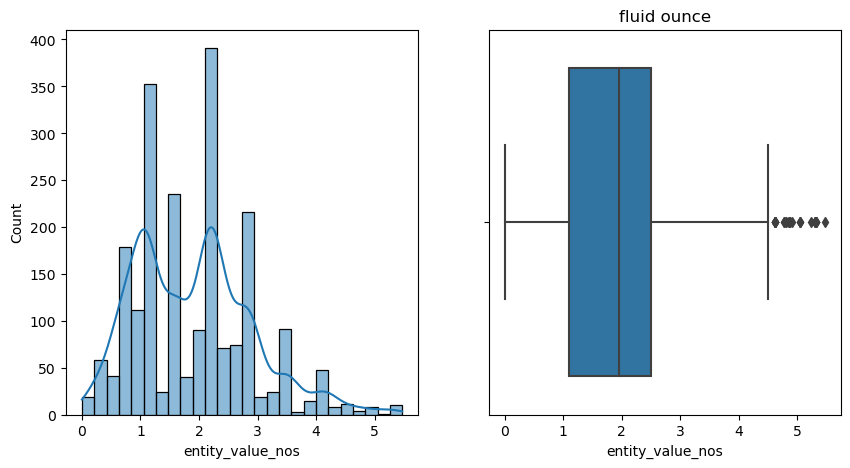

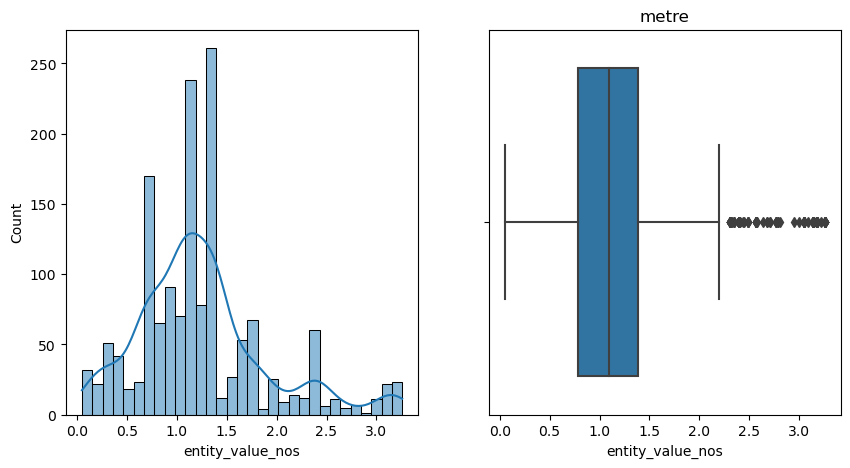

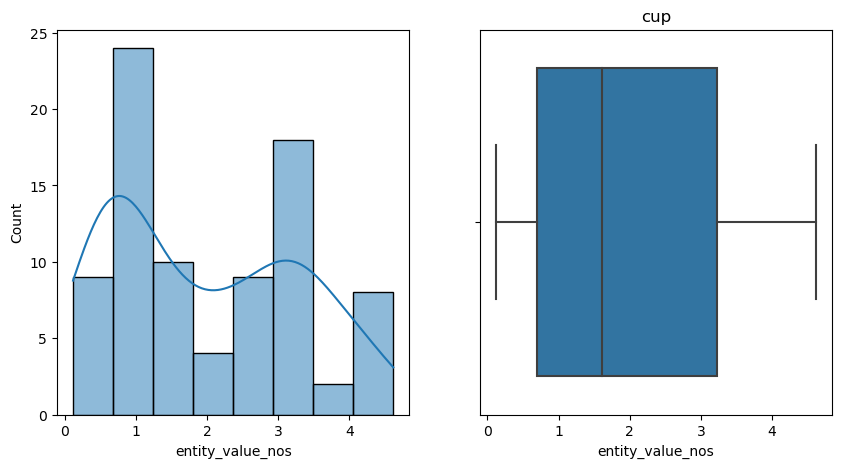

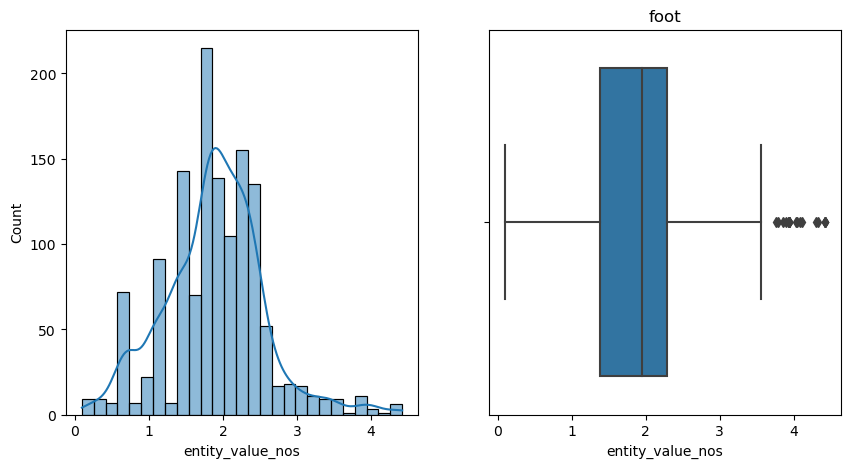

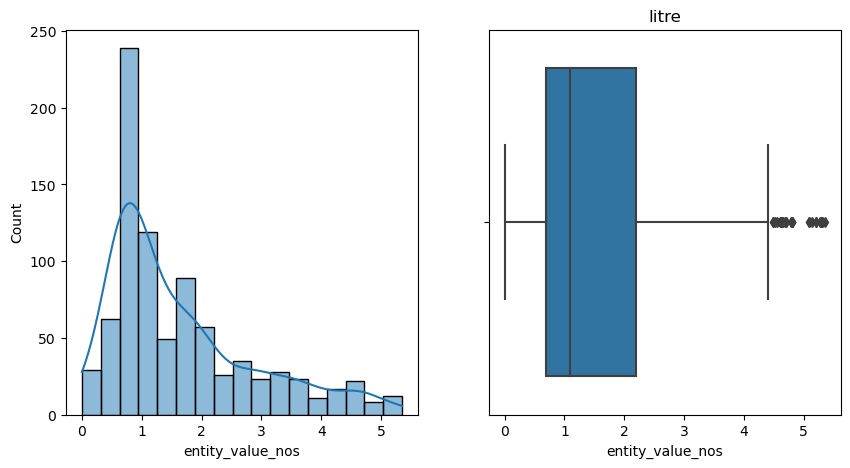

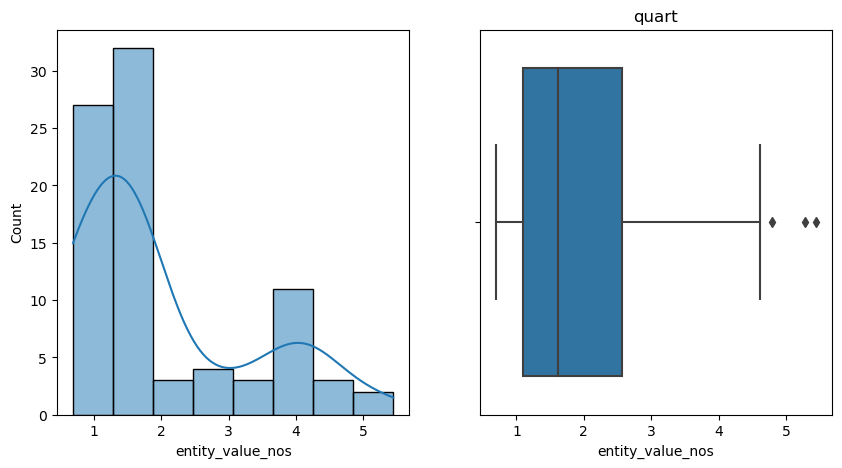

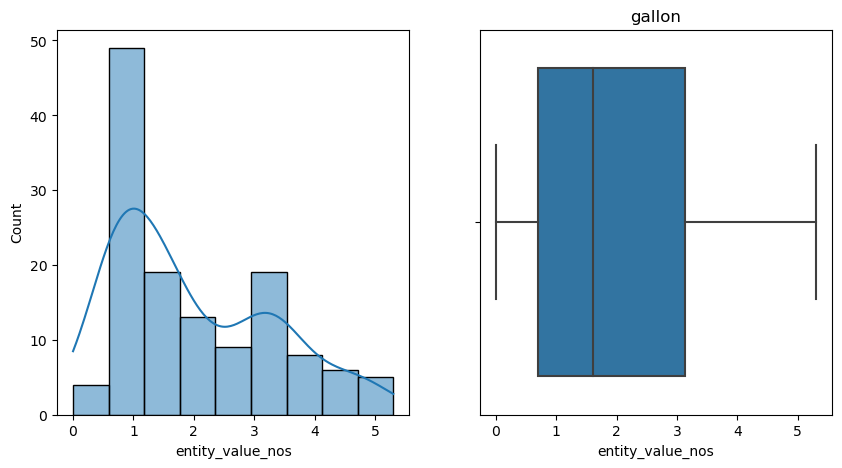

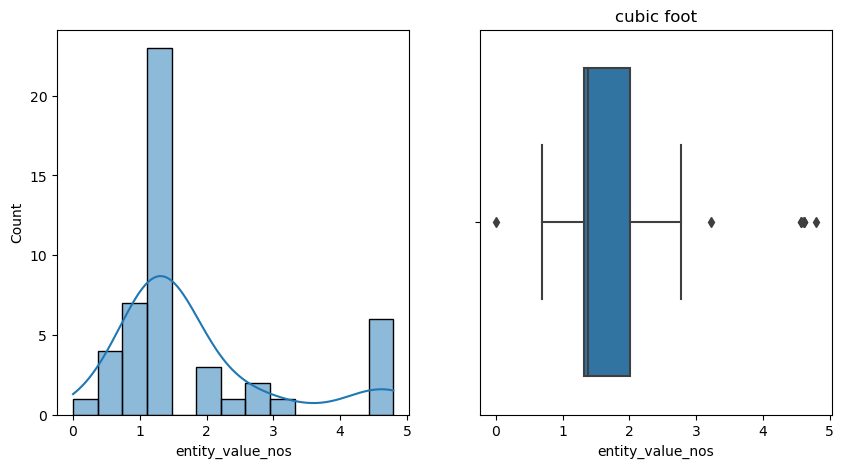

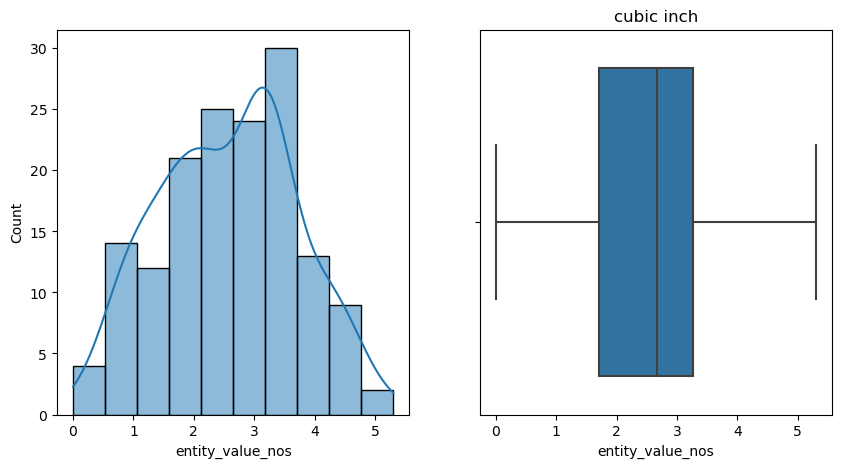

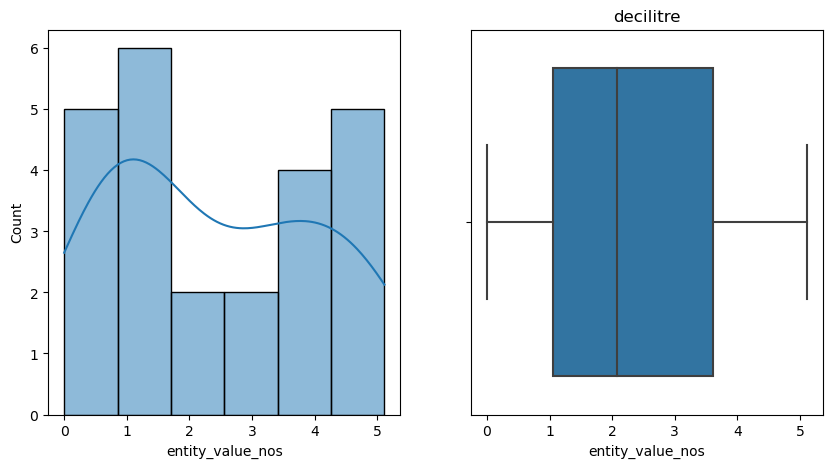

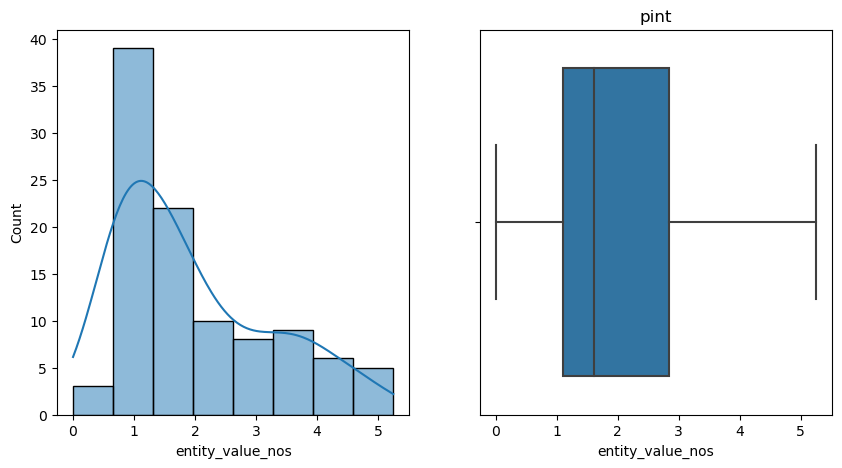

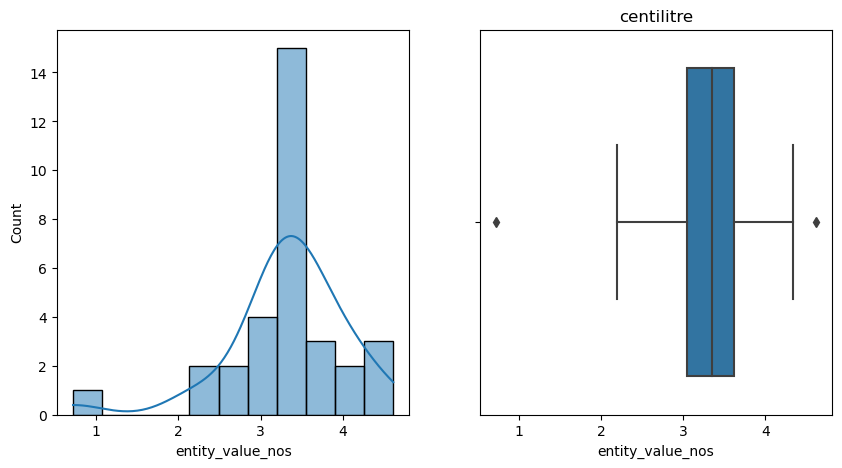

In [29]:
units = {}
for unit in df['entity_value_units'].unique():
    
    unit_sub = df[df['entity_value_units'] == unit]
    units[unit] = unit_sub
    print(f"unit = {unit}, len = {len(units[unit])}")
    
    if 'entity_value_nos' not in df.columns:
        print(f"'entity_value_nos' column is missing for unit {unit}")
        continue
    
    fig,ax = plt.subplots(1,2, figsize =(10,5))

    plt.title(unit)
    sns.histplot(units[unit]['entity_value_nos'],kde=True, ax= ax[0])
    sns.boxplot(x=units[unit]['entity_value_nos'],ax = ax[1])


unit = item_weight, len = 79617
unit = voltage, len = 9084
unit = wattage, len = 6157
unit = maximum_weight_recommendation, len = 2509
unit = height, len = 42302
unit = depth, len = 43334
unit = width, len = 43079
unit = item_volume, len = 6193


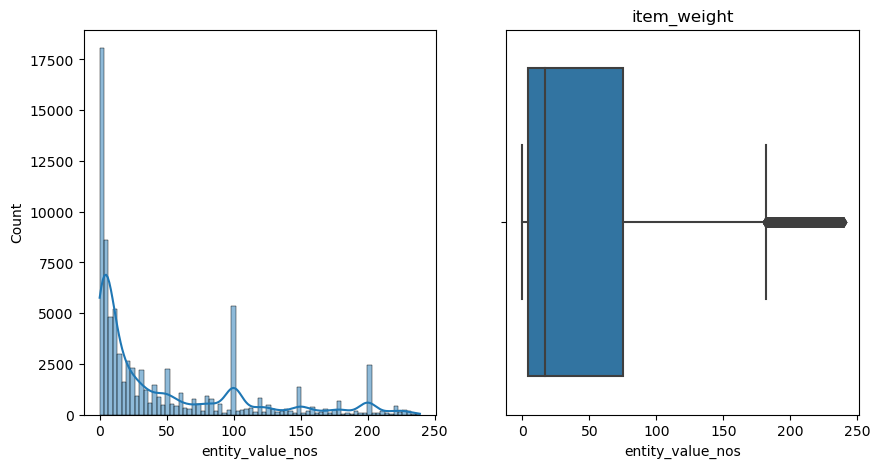

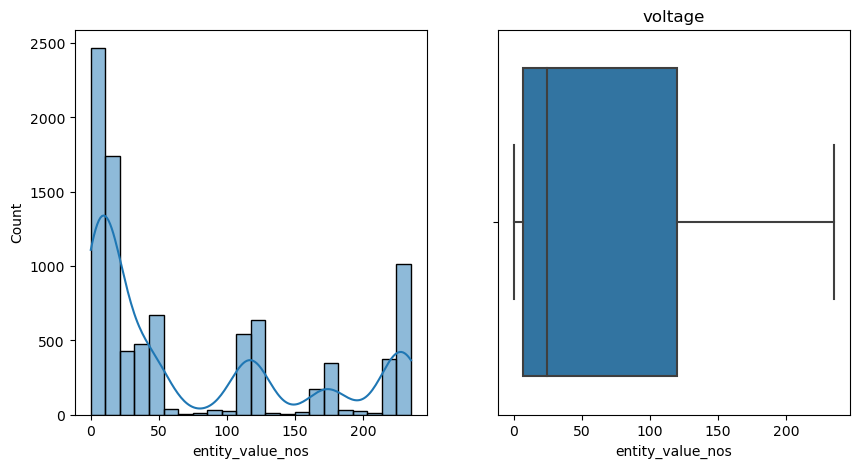

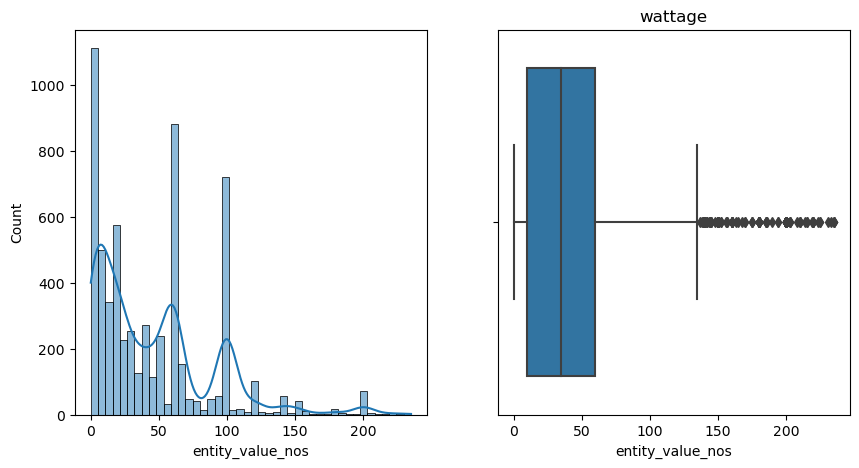

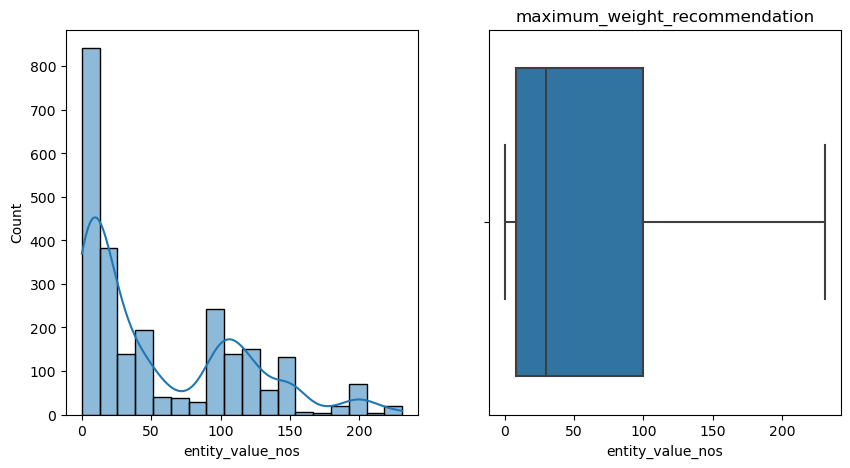

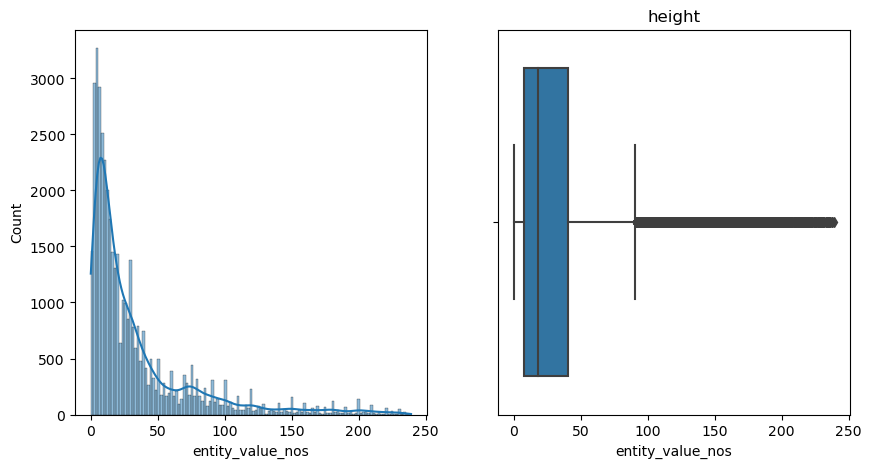

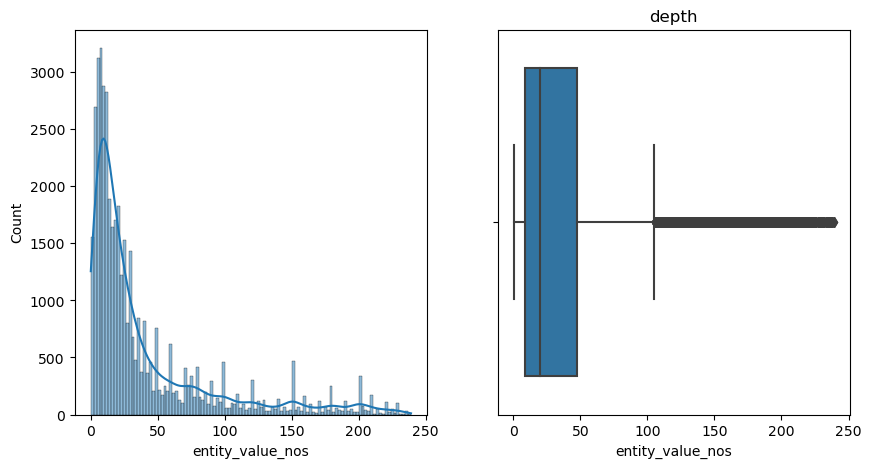

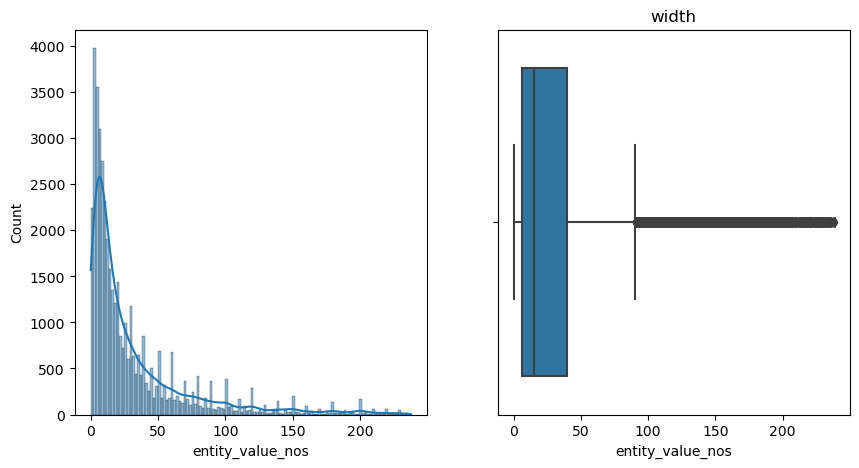

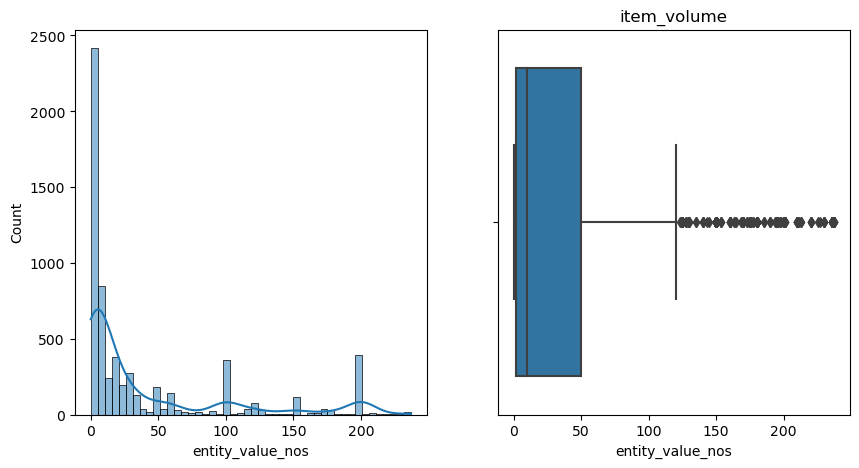

In [27]:
units = {}
for unit in df['entity_name'].unique():
    
    unit_sub = df[df['entity_name'] == unit]
    units[unit] = unit_sub
    print(f"unit = {unit}, len = {len(units[unit])}")
    
    if 'entity_value_nos' not in df.columns:
        print(f"'entity_value_nos' column is missing for unit {unit}")
        continue
    
    fig,ax = plt.subplots(1,2, figsize =(10,5))

    plt.title(unit)
    sns.histplot(units[unit]['entity_value_nos'],kde=True, ax= ax[0])
    sns.boxplot(x=units[unit]['entity_value_nos'],ax = ax[1])

In [56]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['entity_value_nos'].quantile(0.25)
Q3 = df['entity_value_nos'].quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to drop outliers
df_filtered = df[(df['entity_value_nos'] >= lower_bound) & (df['entity_value_nos'] <= upper_bound)]

df_filtered.shape


(232277, 5)

In [77]:
df_filtered.head()

image_link  group_id  entity_name  \
1   https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
2   https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
9   https://m.media-amazon.com/images/I/81N73b5khV...    149159  item_weight   
10  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856  item_weight   
11  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678  item_weight   

    entity_value_nos entity_value_units  
1              0.709               gram  
2              0.709               gram  
9             30.000           kilogram  
10            12.500           kilogram  
11             3.530              ounce

In [78]:
df_filtered.to_csv('process_train_final.csv')

In [76]:
df_filtered[df_filtered['entity_value_nos'] < 10**(-5)]['image_link'].iloc[0]


'https://m.media-amazon.com/images/I/71V8xeIdY8L.jpg'

In [67]:
df_f = df[df['entity_value_nos'] <= 10**5 ]
df_f = df[df['entity_value_nos']>=10**(-5)]
len(df_f)

263216

In [40]:
# Define the conversion factor dictionary (as shown above)
conversion_factors = {
    'gram': 1, 'kilogram': 1000, 'milligram': 0.001, 'microgram': 1e-6, 'ton': 1e6, 'ounce': 28.3495, 'pound': 453.592,
    'millilitre': 1, 'litre': 1000, 'cup': 240, 'fluid ounce': 29.5735, 'quart': 946.353, 'gallon': 3785.41, 
    'cubic foot': 28316.8, 'cubic inch': 16.3871, 'decilitre': 100, 'centilitre': 10, 'pint': 473.176,
    'centimetre': 1, 'metre': 100, 'millimetre': 0.1, 'inch': 2.54, 'foot': 30.48,
    'volt': 1, 'watt': 1, 'kilowatt': 1000
}

# These are the max occurring units for each entity_name
standard_units = {
    'depth': 'centimetre',
    'height': 'centimetre',
    'item_volume': 'millilitre',
    'item_weight': 'gram',
    'maximum_weight_recommendation': 'kilogram',
    'voltage': 'volt',
    'wattage': 'watt',
    'width': 'centimetre'
}

# Function to apply the conversion
def convert_to_standard_unit(row):
    entity_name = row['entity_name']
    unit = row['entity_value_units']
    value = row['entity_value_nos']
    
    # Get the standard unit for this entity_name
    standard_unit = standard_units[entity_name]
    
    # Get the conversion factor for the current unit
    if unit in conversion_factors and standard_unit in conversion_factors:
        conversion_factor = conversion_factors[unit] / conversion_factors[standard_unit]
        return value * conversion_factor
    else:
        return value  # If unit is not in the conversion_factors, return value as is

# Apply the conversion function to the dataframe
df['entity_value_nos_converted'] = df.apply(convert_to_standard_unit, axis=1)



In [41]:
df.head()

Unnamed: 0                                         image_link  group_id  \
0           1  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516   
1           2  https://m.media-amazon.com/images/I/612mrlqiI4...    459516   
2           9  https://m.media-amazon.com/images/I/81N73b5khV...    149159   
3          10  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856   
4          11  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678   

   entity_name  entity_value_nos entity_value_units  \
0  item_weight          0.535908               gram   
1  item_weight          0.535908               gram   
2  item_weight          3.433987           kilogram   
3  item_weight          2.602690           kilogram   
4  item_weight          1.510722              ounce   

   entity_value_nos_converted  
0                    0.535908  
1                    0.535908  
2                 3433.987204  
3                 2602.689685  
4                   42.828212